# Lasso Regression

In [1]:
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt
import math
from sklearn import linear_model
from sklearn.model_selection import KFold

### Create Syntetic data

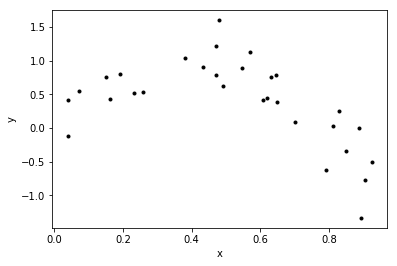

In [2]:
random.seed(98103)
n = 30

x = np.array([random.random() for i in range(n)])
x.sort()

x = x[:,np.newaxis]
y = np.sin(4*x)
e = np.array([random.gauss(0,1.0/3.0) for i in range(n)])
e=e[:,np.newaxis]
y = y+e

df = pd.DataFrame({"X1":x[:,0], "Y":y[:,0]})

def plot_data(df):
    plt.plot(df["X1"], df["Y"], "k.")
    plt.xlabel('x')
    plt.ylabel('y')

plot_data(df)

### Model and helper funcs

In [3]:
def polynomial_features(df, deg):
    df_copy = df.copy()
    for i in range(1, deg):
        df_copy['X'+str(i+1)] = df_copy['X'+str(i)]*df_copy["X1"]
    return df_copy

In [4]:
def polynomial_lasso_regression(data, deg, l1_penalty):
    model = linear_model.Lasso(alpha = l1_penalty, max_iter=3000, tol = 1e-10, normalize=True)
    df = polynomial_features(data, deg)
    X_train = df.drop(columns = ["Y"])
    Y_train = df['Y']
    model.fit(X_train, Y_train)
    return model

In [5]:
def print_coefficients(model):
    deg = len(np.append(model.coef_, model.intercept_)) -1
    w = list(np.append(model.intercept_, model.coef_))
    print('Learned polynomial for degree' + str(deg) + ':')
    print(w)
    w.reverse()
    print(np.poly1d(w))

In [6]:
def plot_poly_predictions(df, model):
    plot_data(df)
    
    deg = len(np.append(model.coef_, model.intercept_))-1
    
    X = pd.DataFrame({"X1": [i/200. for i in range(200)]})
    Y_pred = model.predict(polynomial_features(X, deg))
    
    plt.plot(X["X1"], Y_pred, 'g-', label = 'degree ' + str(deg) + ' fit')
    plt.legend(loc = 'upper left')
    plt.axis([0,1,-1.5,2])

### Choosing best L1 penalty parameter

C:\Users\abido\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\abido\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


l1_penalty = 1.000000e-04
number of nonzeros = 7
Learned polynomial for degree16:
[0.10309173806938204, 3.10197513673271, -0.0, -5.220528155112347, -1.2011679444617602, -0.0, 0.0, 0.0, 1.162094432465579, 1.911884124450312, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.7256294879050622]
         16     15     14         9         8     5         4         3
-0.7256 x  - 0 x  - 0 x  + 1.912 x + 1.162 x - 0 x - 1.201 x - 5.221 x
      2
 - 0 x + 3.102 x + 0.1031


l1_penalty = 1.000000e-02
number of nonzeros = 3
Learned polynomial for degree16:
[0.6946616483566637, 0.0, -0.0, -0.0, -0.0, -0.20530976495031314, -2.08146862262618, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0]
        6          5     4     3     2
-2.081 x - 0.2053 x - 0 x - 0 x - 0 x + 0.6947


l1_penalty = 1.000000e-01
number of nonzeros = 1
Learned polynomial for degree16:
[0.38872856009436485, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0]
 
0.3887


l1_penalty = 1.0000

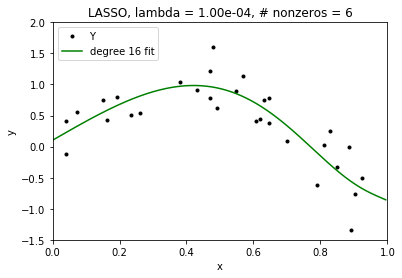

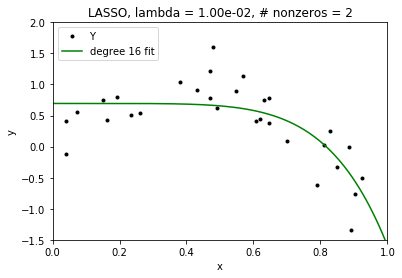

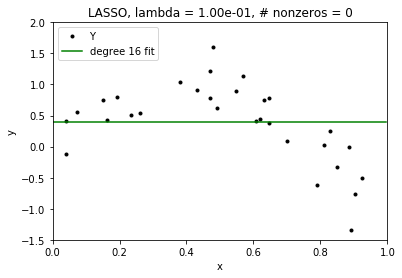

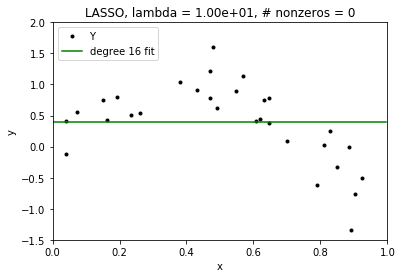

In [7]:
for l1_penalty in [0.0001, 0.01, 0.1, 10]:
    model = polynomial_lasso_regression(df, deg=16, l1_penalty=l1_penalty)
    print('l1_penalty = %e' % l1_penalty)
    print('number of nonzeros = %d' % np.count_nonzero(np.append(model.intercept_, model.coef_)))
    print_coefficients(model)
    print('\n')
    plt.figure()
    plot_poly_predictions(df,model)
    plt.title('LASSO, lambda = %.2e, # nonzeros = %d' % (l1_penalty, np.count_nonzero((model.coef_))))